# Fashion-MNIST classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = [
    'top', 'trousers', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
val_x, val_y = test_x[:5000], test_y[:5000]
test_x, test_y = test_x[5000:], test_y[5000:]

In [5]:
print(f'Images shape: {train_x.shape} : {val_x.shape} : {test_x.shape}')
print(f'Labels shape: {train_y.shape} : {val_y.shape} : {test_y.shape}')

Images shape: (60000, 28, 28) : (5000, 28, 28) : (5000, 28, 28)
Labels shape: (60000,) : (5000,) : (5000,)


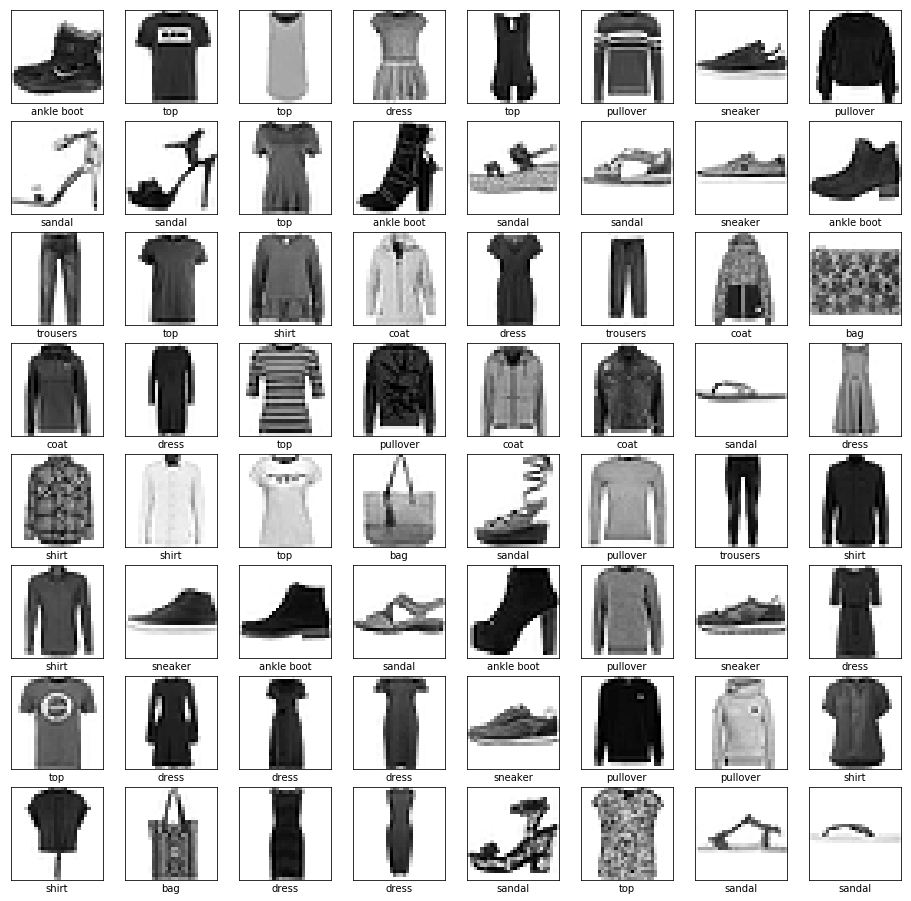

In [6]:
plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

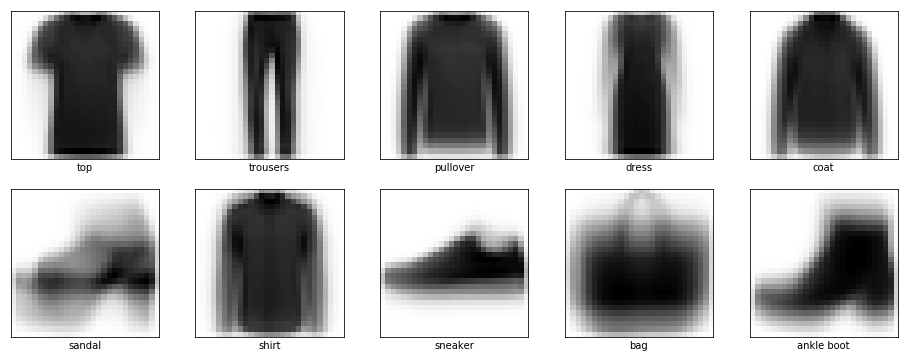

In [7]:
centroids = [(labels[i], np.mean(train_x[train_y == i], axis=0)) for i in np.unique(train_y)]

plt.figure(figsize=(16, 6))
for i, (label, image) in enumerate(centroids):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
train_x = train_x / 255
val_x = val_x / 255
test_x = test_x / 255

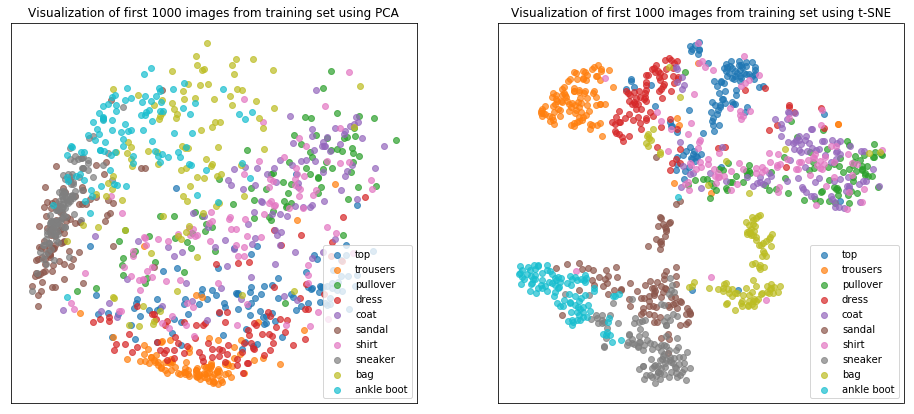

In [9]:
points_n = 1000
plt.figure(figsize=(16, 7))
for i, (alg_name, alg) in enumerate([
        ('PCA', PCA(n_components=2)), ('t-SNE', TSNE(n_components=2))]):
    x = alg.fit_transform(train_x[:points_n].reshape(-1, 784))
    y = train_y[:points_n]
    data = [(labels[i], x[y == i]) for i in np.unique(y)]
    
    plt.subplot(1, 2, i + 1)
    for label, points in data:
        plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=label)
    plt.title(f'Visualization of first {points_n} images from training set using {alg_name}')
    plt.legend()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
def plot_history(history):
    plt.figure(figsize=(16, 5))
    for i, (name, key) in enumerate([('accuracy', 'acc'), ('loss', 'loss')]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.epoch, history.history[key], label=f'training {name}')
        plt.plot(history.epoch, history.history[f'val_{key}'], label=f'validation {name}')
        plt.title(f'Visualization of {name} during training')
        plt.legend()
        plt.xlabel('epoch')
        plt.ylabel(name)
    plt.show()
    
    
def plot_confusion_matrix(cm, labels=labels):
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.binary)
    threshold = np.max(cm) / 2
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(
                j, i, cm[i, j], color='white' if cm[i, j] > threshold else 'black',
                horizontalalignment='center', verticalalignment='center')
    plt.title('Confusion matrix')
    plt.xlabel('predicted label')
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.ylabel('true label')
    plt.yticks(range(len(labels)), labels)
    plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    train_x,
    train_y,
    validation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 4s - loss: 0.7158 - acc: 0.7505 - val_loss: 0.4834 - val_acc: 0.8390
Epoch 2/50
 - 4s - loss: 0.5037 - acc: 0.8216 - val_loss: 0.4407 - val_acc: 0.8506
Epoch 3/50
 - 3s - loss: 0.4553 - acc: 0.8365 - val_loss: 0.4144 - val_acc: 0.8524
Epoch 4/50
 - 3s - loss: 0.4301 - acc: 0.8445 - val_loss: 0.3928 - val_acc: 0.8588
Epoch 5/50
 - 3s - loss: 0.4101 - acc: 0.8518 - val_loss: 0.3791 - val_acc: 0.8646
Epoch 6/50
 - 3s - loss: 0.3977 - acc: 0.8553 - val_loss: 0.3733 - val_acc: 0.8696
Epoch 7/50
 - 3s - loss: 0.3875 - acc: 0.8588 - val_loss: 0.3682 - val_acc: 0.8672
Epoch 8/50
 - 3s - loss: 0.3807 - acc: 0.8616 - val_loss: 0.3649 - val_acc: 0.8716
Epoch 9/50
 - 3s - loss: 0.3727 - acc: 0.8627 - val_loss: 0.3556 - val_acc: 0.8724
Epoch 10/50
 - 3s - loss: 0.3636 - acc: 0.8672 - val_loss: 0.3568 - val_acc: 0.8702
Epoch 11/50
 - 3s - loss: 0.3584 - acc: 0.8680 - val_loss: 0.3532 - val_acc: 0.8718
Epoch 12/50
 - 3s - loss: 0.3545 - a

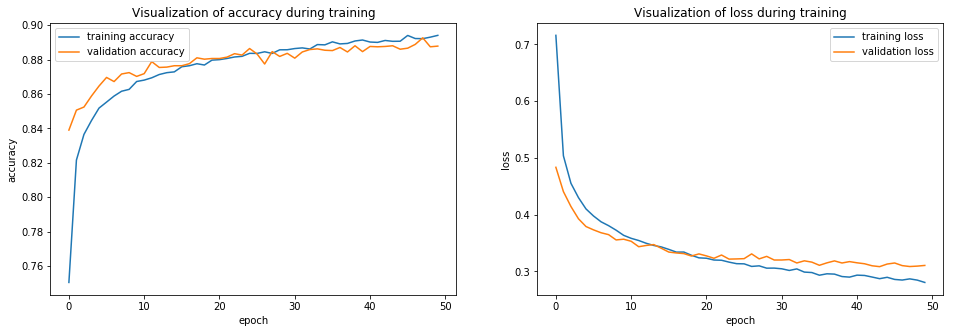

In [13]:
plot_history(history)

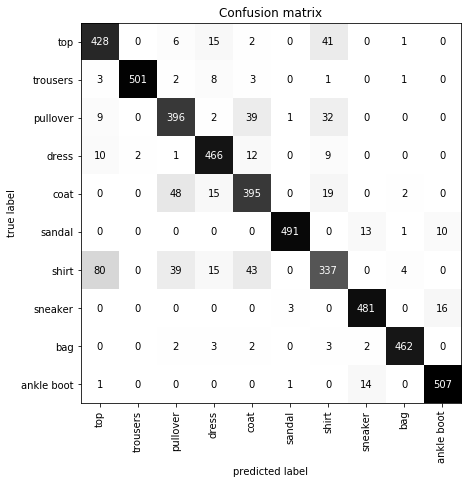

In [14]:
cm = confusion_matrix(test_y, model.predict(test_x).argmax(axis=-1))
plot_confusion_matrix(cm)

In [15]:
_, acc = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 89.28%


In [16]:
HOG_SETTINGS = {
    'orientations': 8,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (1, 1),
    'block_norm': 'L2-Hys',
}

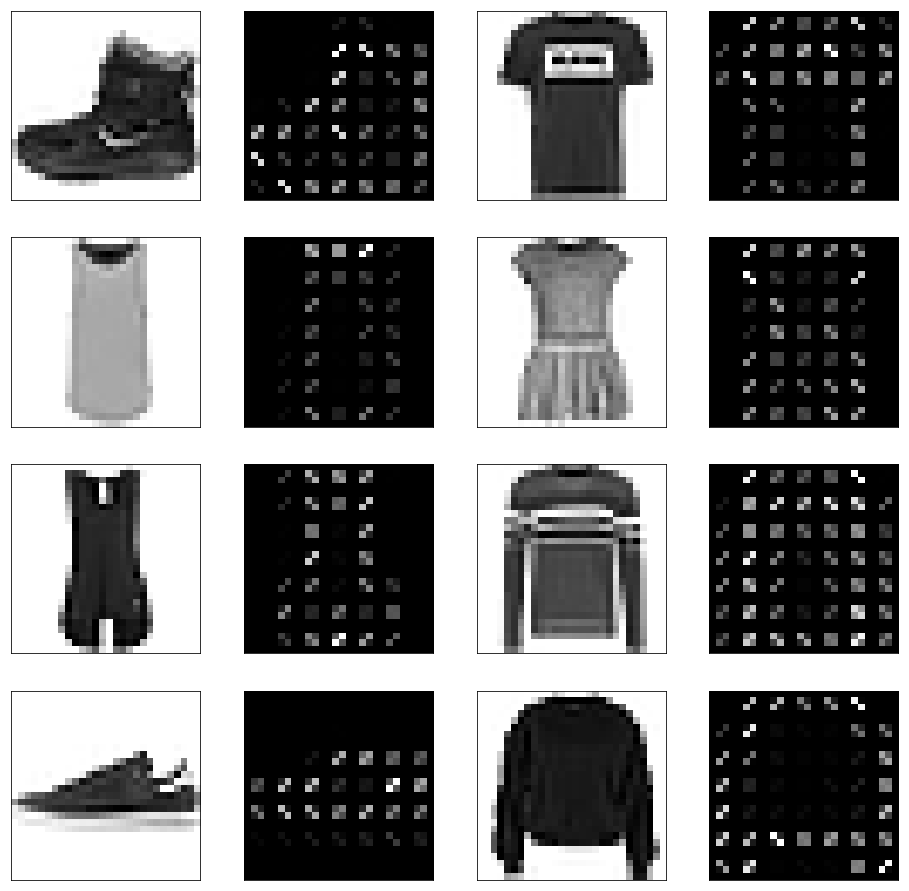

In [17]:
plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    _, hog_image = hog(train_x[i], visualize=True, **HOG_SETTINGS)
    plt.subplot(4, 4, 2 * i + 2)
    plt.imshow(hog_image, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
def hog_array(x):
    return np.array([hog(im, **HOG_SETTINGS) for im in x])

In [19]:
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_shape=(392,)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               58950     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 60,460
Trainable params: 60,460
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    hog_array(train_x),
    train_y,
    validation_data=(hog_array(val_x), val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 2s - loss: 0.7402 - acc: 0.7411 - val_loss: 0.4604 - val_acc: 0.8312
Epoch 2/50
 - 2s - loss: 0.4908 - acc: 0.8209 - val_loss: 0.4208 - val_acc: 0.8436
Epoch 3/50
 - 2s - loss: 0.4560 - acc: 0.8338 - val_loss: 0.3967 - val_acc: 0.8534
Epoch 4/50
 - 2s - loss: 0.4338 - acc: 0.8400 - val_loss: 0.3879 - val_acc: 0.8542
Epoch 5/50
 - 2s - loss: 0.4138 - acc: 0.8468 - val_loss: 0.3763 - val_acc: 0.8616
Epoch 6/50
 - 2s - loss: 0.4009 - acc: 0.8523 - val_loss: 0.3640 - val_acc: 0.8636
Epoch 7/50
 - 2s - loss: 0.3904 - acc: 0.8553 - val_loss: 0.3560 - val_acc: 0.8688
Epoch 8/50
 - 2s - loss: 0.3815 - acc: 0.8573 - val_loss: 0.3515 - val_acc: 0.8720
Epoch 9/50
 - 2s - loss: 0.3734 - acc: 0.8598 - val_loss: 0.3566 - val_acc: 0.8682
Epoch 10/50
 - 2s - loss: 0.3652 - acc: 0.8634 - val_loss: 0.3411 - val_acc: 0.8752
Epoch 11/50
 - 2s - loss: 0.3600 - acc: 0.8645 - val_loss: 0.3400 - val_acc: 0.8758
Epoch 12/50
 - 2s - loss: 0.3532 - a

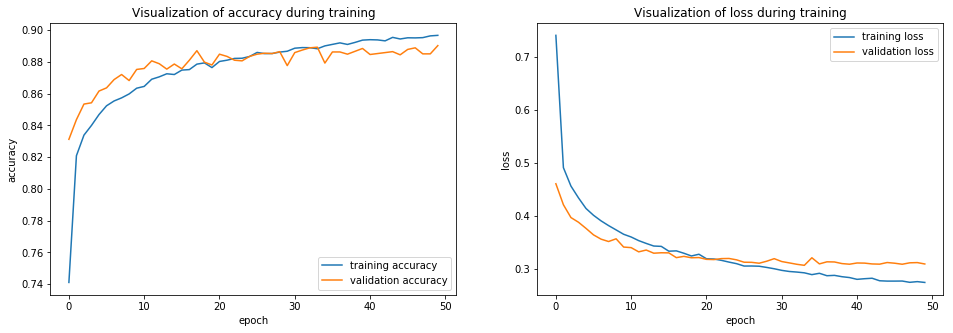

In [21]:
plot_history(history)

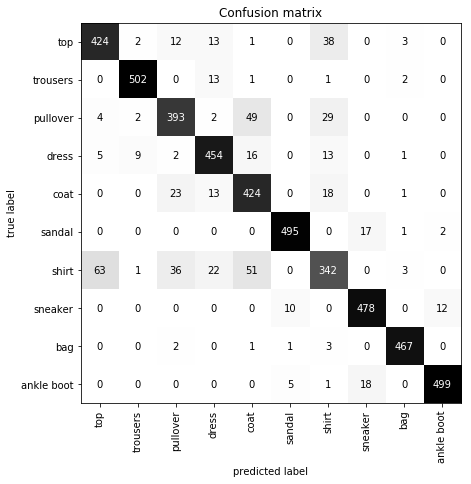

In [22]:
cm = confusion_matrix(test_y, model.predict(hog_array(test_x)).argmax(axis=-1))
plot_confusion_matrix(cm)

In [23]:
_, acc = model.evaluate(hog_array(test_x), test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 89.56%


In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [25]:
history = model.fit(
    train_x.reshape(-1, 28, 28, 1),
    train_y,
    validation_data=(val_x.reshape(-1, 28, 28, 1), val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 52s - loss: 0.8789 - acc: 0.6790 - val_loss: 0.5198 - val_acc: 0.8116
Epoch 2/50
 - 51s - loss: 0.5224 - acc: 0.8118 - val_loss: 0.4127 - val_acc: 0.8542
Epoch 3/50
 - 50s - loss: 0.4421 - acc: 0.8431 - val_loss: 0.3716 - val_acc: 0.8686
Epoch 4/50
 - 52s - loss: 0.3982 - acc: 0.8567 - val_loss: 0.3446 - val_acc: 0.8776
Epoch 5/50
 - 51s - loss: 0.3691 - acc: 0.8677 - val_loss: 0.3323 - val_acc: 0.8842
Epoch 6/50
 - 52s - loss: 0.3513 - acc: 0.8730 - val_loss: 0.3156 - val_acc: 0.8870
Epoch 7/50
 - 55s - loss: 0.3343 - acc: 0.8792 - val_loss: 0.3096 - val_acc: 0.8892
Epoch 8/50
 - 51s - loss: 0.3204 - acc: 0.8851 - val_loss: 0.2965 - val_acc: 0.8946
Epoch 9/50
 - 49s - loss: 0.3117 - acc: 0.8876 - val_loss: 0.2943 - val_acc: 0.8956
Epoch 10/50
 - 52s - loss: 0.2987 - acc: 0.8932 - val_loss: 0.2923 - val_acc: 0.8954
Epoch 11/50
 - 50s - loss: 0.2906 - acc: 0.8957 - val_loss: 0.2906 - val_acc: 0.8952
Epoch 12/50
 - 52s - loss

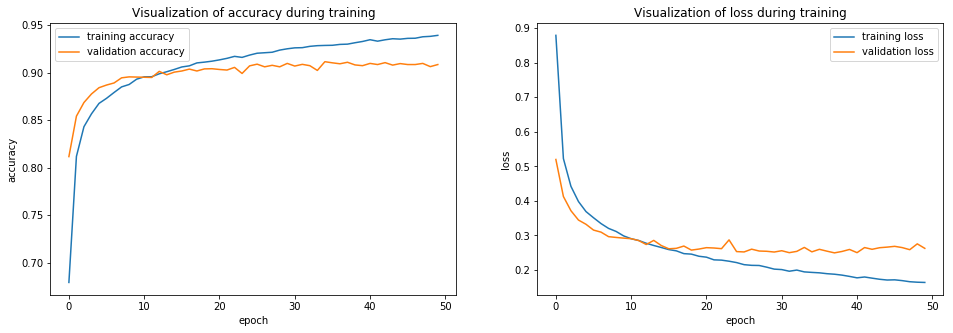

In [26]:
plot_history(history)

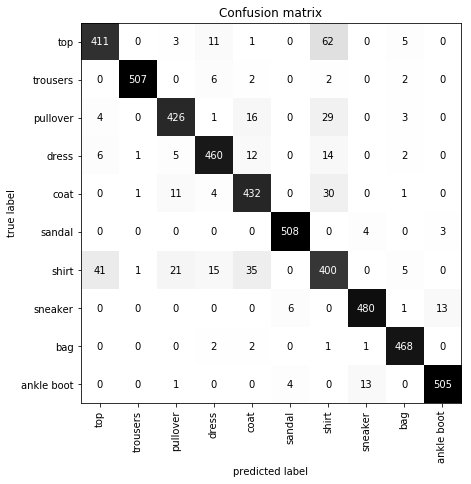

In [27]:
cm = confusion_matrix(test_y, model.predict(test_x.reshape(-1, 28, 28, 1)).argmax(axis=-1))
plot_confusion_matrix(cm)

In [28]:
_, acc = model.evaluate(test_x.reshape(-1, 28, 28, 1), test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 91.94%
